In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import skimage.io
import os
import tqdm
import glob
import tensorflow
import warnings
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras.backend as K
from tensorflow.keras.applications.xception import Xception, preprocess_input
#import tensorflow_addons as tfa
#from tensorflow.keras.metrics import Metric
#from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typing import Optional
import pickle
import matplotlib.image as mpimg

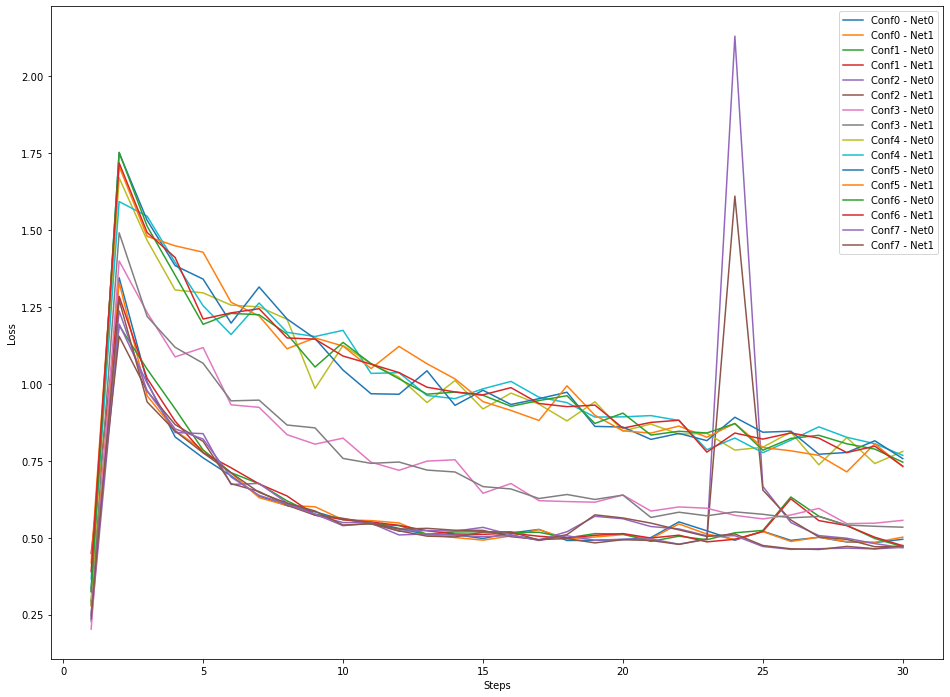

In [34]:
fig, ax = plt.subplots(figsize=(16, 12))

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_00/run-garbage_dml_normal_00_logs-tag-tower_0_net0_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_00/run-garbage_dml_normal_00_logs-tag-tower_0_net1_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_01/run-garbage_dml_normal_01_logs-tag-tower_0_net0_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_01/run-garbage_dml_normal_01_logs-tag-tower_0_net1_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_02/run-garbage_dml_normal_02_logs-tag-tower_0_net0_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_02/run-garbage_dml_normal_02_logs-tag-tower_0_net1_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_03/run-garbage_dml_normal_03_logs-tag-tower_0_net0_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_03/run-garbage_dml_normal_03_logs-tag-tower_0_net1_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_04/run-garbage_dml_normal_04_logs-tag-tower_0_net0_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_04/run-garbage_dml_normal_04_logs-tag-tower_0_net1_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_05/run-garbage_dml_normal_05_logs-tag-tower_0_net0_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_05/run-garbage_dml_normal_05_logs-tag-tower_0_net1_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_06/run-garbage_dml_normal_06_logs-tag-tower_0_net0_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_06/run-garbage_dml_normal_06_logs-tag-tower_0_net1_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_07/run-garbage_dml_normal_07_logs-tag-tower_0_net0_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_07/run-garbage_dml_normal_07_logs-tag-tower_0_net1_loss_avg.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

ax.set_xlabel('Steps')
ax.set_ylabel('Loss')
ax.legend(['Conf0 - Net0', 'Conf0 - Net1',
           'Conf1 - Net0', 'Conf1 - Net1',
           'Conf2 - Net0', 'Conf2 - Net1',
           'Conf3 - Net0', 'Conf3 - Net1',
           'Conf4 - Net0', 'Conf4 - Net1',
           'Conf5 - Net0', 'Conf5 - Net1',
           'Conf6 - Net0', 'Conf6 - Net1',
           'Conf7 - Net0', 'Conf7 - Net1'])

plt.show()

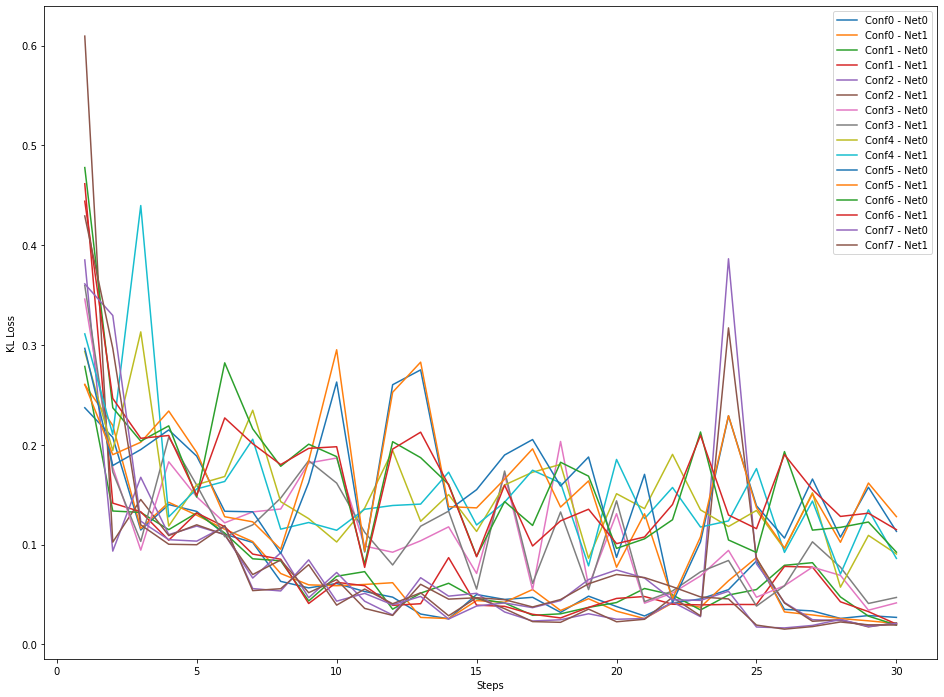

In [32]:
fig, ax = plt.subplots(figsize=(16, 12))

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_00/run-garbage_dml_normal_00_logs-tag-tower_0_kl_loss_01.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_00/run-garbage_dml_normal_00_logs-tag-tower_0_kl_loss_10.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])


data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_01/run-garbage_dml_normal_01_logs-tag-tower_0_kl_loss_01.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_01/run-garbage_dml_normal_01_logs-tag-tower_0_kl_loss_10.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])


data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_02/run-garbage_dml_normal_02_logs-tag-tower_0_kl_loss_01.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_02/run-garbage_dml_normal_02_logs-tag-tower_0_kl_loss_10.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_03/run-garbage_dml_normal_03_logs-tag-tower_0_kl_loss_01.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_03/run-garbage_dml_normal_03_logs-tag-tower_0_kl_loss_10.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_04/run-garbage_dml_normal_04_logs-tag-tower_0_kl_loss_01.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_04/run-garbage_dml_normal_04_logs-tag-tower_0_kl_loss_10.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_05/run-garbage_dml_normal_05_logs-tag-tower_0_kl_loss_01.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_05/run-garbage_dml_normal_05_logs-tag-tower_0_kl_loss_10.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_06/run-garbage_dml_normal_06_logs-tag-tower_0_kl_loss_01.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_06/run-garbage_dml_normal_06_logs-tag-tower_0_kl_loss_10.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_07/run-garbage_dml_normal_07_logs-tag-tower_0_kl_loss_01.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_07/run-garbage_dml_normal_07_logs-tag-tower_0_kl_loss_10.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])


ax.set_xlabel('Steps')
ax.set_ylabel('KL Loss')
ax.legend(['Conf0 - Net0', 'Conf0 - Net1',
           'Conf1 - Net0', 'Conf1 - Net1',
           'Conf2 - Net0', 'Conf2 - Net1',
           'Conf3 - Net0', 'Conf3 - Net1',
           'Conf4 - Net0', 'Conf4 - Net1',
           'Conf5 - Net0', 'Conf5 - Net1',
           'Conf6 - Net0', 'Conf6 - Net1',
           'Conf7 - Net0', 'Conf7 - Net1'])

plt.show()

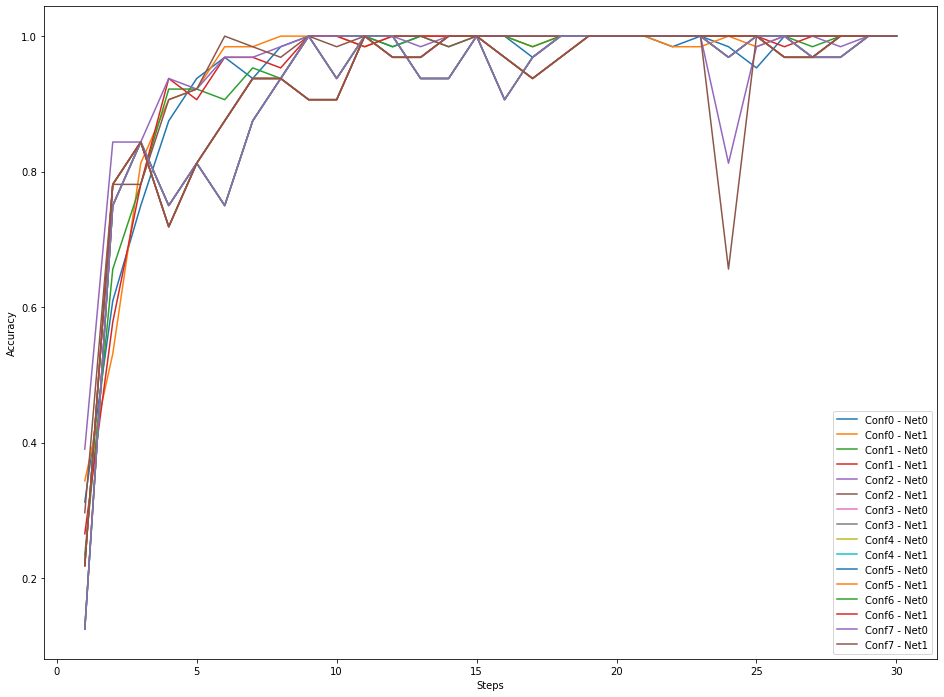

In [21]:
fig, ax = plt.subplots(figsize=(16, 12))

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_00/precision_0.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_00/precision_1.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_01/precision_0.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_01/precision_1.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_02/precision_0.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_02/precision_1.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_03/precision_0.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_03/precision_1.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_04/precision_0.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_04/precision_1.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_05/precision_0.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_05/precision_1.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_06/precision_0.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_06/precision_1.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_07/precision_0.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])
data = pd.read_csv('/home/hamid/PycharmProjects/Deep-Mutual-Learning/data/garbage_dml_normal_07/precision_1.csv')
ax.plot(range(1, len(data['Value']) + 1), data['Value'])

ax.set_xlabel('Steps')
ax.set_ylabel('Accuracy')
ax.legend(['Conf0 - Net0', 'Conf0 - Net1',
           'Conf1 - Net0', 'Conf1 - Net1',
           'Conf2 - Net0', 'Conf2 - Net1',
           'Conf3 - Net0', 'Conf3 - Net1',
           'Conf4 - Net0', 'Conf4 - Net1',
           'Conf5 - Net0', 'Conf5 - Net1',
           'Conf6 - Net0', 'Conf6 - Net1',
           'Conf7 - Net0', 'Conf7 - Net1'])

plt.show()